## Feature Selection, Model Selection, And Tuning Project
### Github: https://github.com/cmelende/FeatureAndModelSelectionAndTuningProject.git
### Cory Melendez
### 8/28/2020

In [1]:
import pandas as pd
import seaborn as sns
from univariateAnalysis import UniVariateAnalysis, UniVariateReport

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
concrete_df = pd.read_csv('data/concrete.csv')


In [3]:
columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
targetColumn = 'strength'

def print_all_uni_analysis_reports(df,columnNames):
    seperator = '---------------------------------------------'
    for column in columnNames:
        analysis = UniVariateAnalysis(df, column)
        analysis_report = UniVariateReport(analysis)

        print(seperator)
        print(f'\'{column}\' column univariate analysis report')
        print(seperator)

        analysis_report.print_report()


### 1. UniVariate Analysis

In [4]:
print_all_uni_analysis_reports(df = concrete_df, columnNames=columns)

---------------------------------------------
'cement' column univariate analysis report
---------------------------------------------
Data type:  float64
Range of values: (102.0, 540.0)
Standard deviation:  104.50636449481532
Q1:  192.375
Q2:  272.9
Q3:  350.0
Q4:  540.0
Mean:  281.16786407766995
Min:  102.0
Median:  272.9
Max:  540.0
Top whisker:  586.4375
Bottom whisker:  -44.0625
Number of outliers above the top whisker:  0
Number of outliers below the bottom whisker:  0
---------------------------------------------
'slag' column univariate analysis report
---------------------------------------------
Data type:  float64
Range of values: (0.0, 359.4)
Standard deviation:  86.27934174810582
Q1:  0.0
Q2:  22.0
Q3:  142.95
Q4:  359.4
Mean:  73.89582524271844
Min:  0.0
Median:  22.0
Max:  359.4
Top whisker:  357.375
Bottom whisker:  -214.42499999999998
Number of outliers above the top whisker:  2
Indices of higher outlier rows
1) 918
2) 990
Number of outliers below the bottom whisker:  

### 2. Bivariate Analysis

### Cement
Strong relationship, seems to be a mostly positive correlation between this column and the strength of the column. Thouhgh it does oscilate some - but we may be able to attribute the dips to other factors as well (ie maybe the dips had more water in them which weakened it)

<AxesSubplot:xlabel='cement', ylabel='strength'>

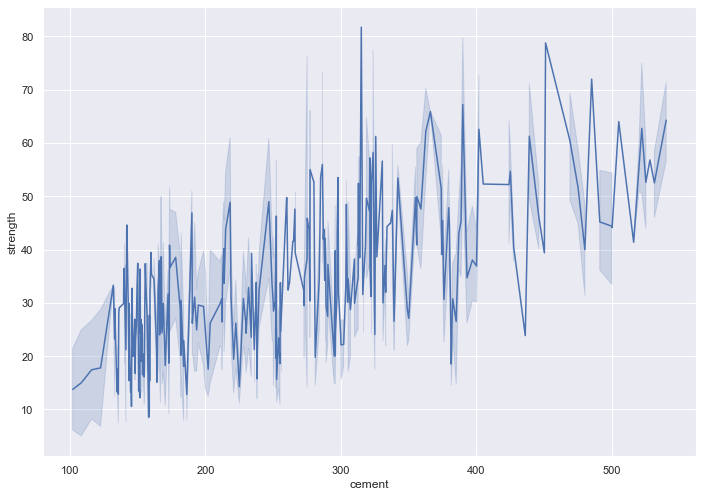

In [5]:
sns.lineplot(x='cement', y=targetColumn, data=concrete_df) 

### Slag
There is a very small relationship between slag and target column, the data points are pretty scattered


In [6]:
analysis = UniVariateAnalysis(concrete_df, 'slag')

<AxesSubplot:xlabel='slag', ylabel='strength'>

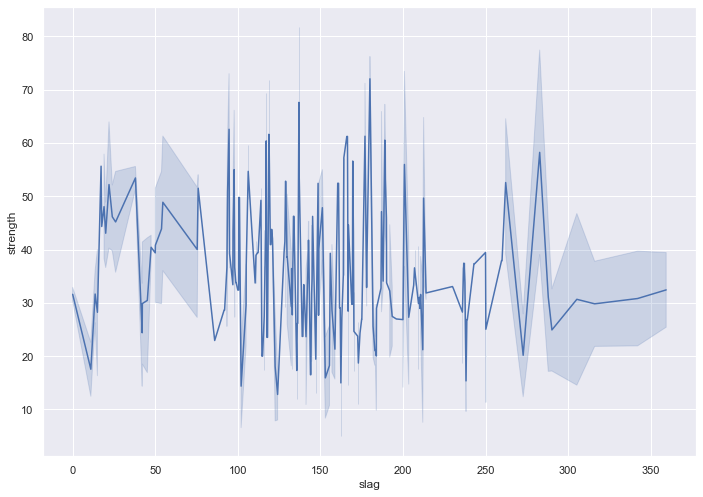

In [7]:
sns.lineplot(x='slag', y=targetColumn, data=concrete_df) 

In [8]:
sns.lineplot(x='slag', y=targetColumn, data=analysis.get_df_without_outliers_on_column()) 

TypeError: get_higher_whisker_value() takes 1 positional argument but 3 were given

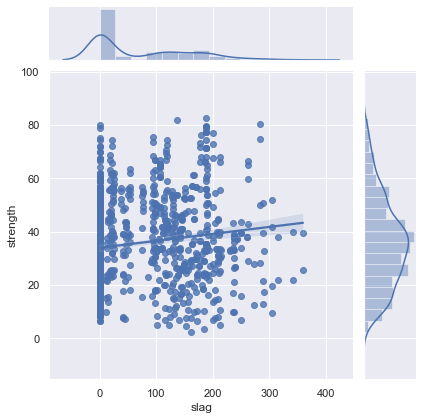

In [9]:
sns.jointplot("slag", targetColumn, data=concrete_df, kind='reg');


 
slag 
ash 
water
superplastic
coarseagg
fineagg
age
targetColumn = 'strength'

In [10]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
